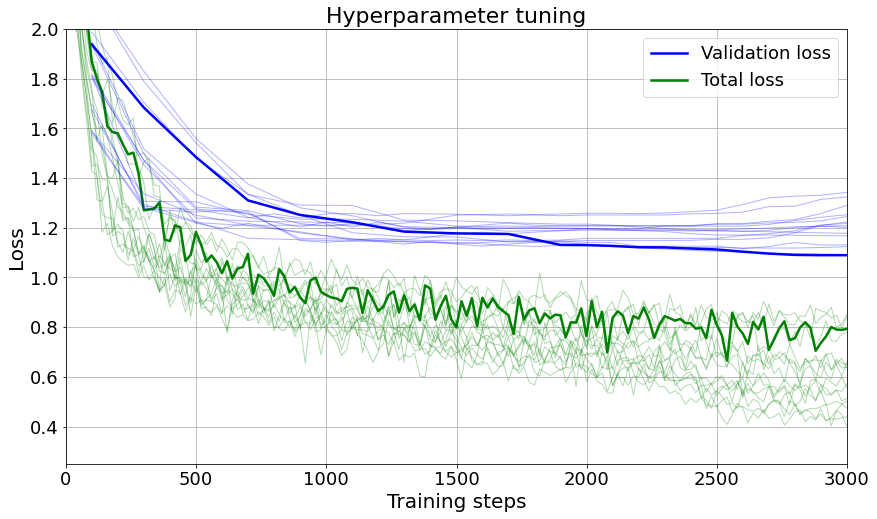

In [1]:
import pandas as pd
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn

#Plot real distribution of test dataset man vs machine
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig , ax = plt.subplots(figsize=[14,8])
#fig.patch.set_facecolor('xkcd:mint green')

path_vl = '/home/martin/container/hail/detectron2/output/logs/hparam_tuning/validation_loss/'
path_tl = '/home/martin/container/hail/detectron2/output/logs/hparam_tuning/total_loss/'

for i in np.arange(0,15):
    d = pd.read_csv(path_vl+'run-'+str(i)+'.csv')
    t = pd.read_csv(path_tl+'run-'+str(i)+'.csv')
    if i == 3:
        plt.plot(d['Step'], d['Value'],color='blue',linewidth=2.5, label='Validation loss')
        plt.plot(t['Step'], t['Value'],color='green',linewidth=2.5,label='Total loss')
    else:
        plt.plot(d['Step'], d['Value'],color='blue',linewidth=1, alpha=0.3, label='')
        plt.plot(t['Step'], t['Value'],color='green',linewidth=1, alpha=0.3, label='')
    
plt.title('Hyperparameter tuning',fontsize=22)
plt.xlabel('Training steps')
plt.ylabel('Loss')
plt.ylim([0.25,2])
plt.xlim([0,3000])
plt.legend()
plt.grid()

plot_dir = '/home/martin/container/hail/detectron2/products/hparam_tuning/run-3/plots/'
plt.savefig(plot_dir+'Validation_loss_comparison.png',dpi=300,bbox_inches='tight',facecolor='white')
plt.show()